# This script: 
## 1) shows the workflow for generating the sampling distributions for p and gamma values in the paper
## 2) Creates Figure 3 in the paper.



#### Import the packages needed

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyDOE import *
# lhs(4, criterion='center')

#### Generate the latin hypercube, and weighted sampling distributions

In [2]:
# Create a 2d latin hypercube
LH = lhs(2, criterion='maximin',samples=10000)
# we use 10000 samples for the figure in the paper, but it takes a long time (tens of minutes) to run.  
# So for I recommend lowering it to samples = 500 or lower for experimentation.
# to generate 25 pairs of p and gamma like we did in the paper, change to samples = 25


# Generate list of p values by transforming the LH values by the inverse of the cumulative of the p distribution.
# original p distribution : (alpha+1)*(p**alpha)
# inverse of cumulative: p = x**(1/alpha+1), where x is a (uniform) random variable
alpha = 1.5  # shape parameter for the distribution
p_list = LH[:,1]**(1/(1+alpha)) #deform the p spacing (y axis)

# Generate list of gamma values by transforming the LH values by the inverse of the cumulative of the gamma distribution
# original gamma distribution : (1/Z)*(1/((a*gamma-1)**2 + 1))
# inverse of cumulative: gamma = (1+ tan(aZx + arctan(a*gamma_min - 1)))/a, where x is a (uniform) random variable
a = 3.5e-7  # shape parameter for the distribution

# We don't have a closed form solution for the inverse of the cumulative, but we can get it numerically.
# define min and max gamma bounds
min_gamma = 1470000
max_gamma = 10000000  # according to Jourdain (2020), this is actually 2.94x10^7 but we truncate at 1e7 because this tends to be too large. This is in agreement with Jourdain in personal communications

# Find the normalization constant
Z = np.arctan(a*max_gamma-1)/a - np.arctan(a*min_gamma-1)/a
gamma_list = (1 + np.tan(a*Z*LH[:,0] + np.arctan(a*min_gamma-1)))/a  #deform the gamma spacing (y axis)



#### Plot the sampling distribution

/Users/mira/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(1000000, 11000000)

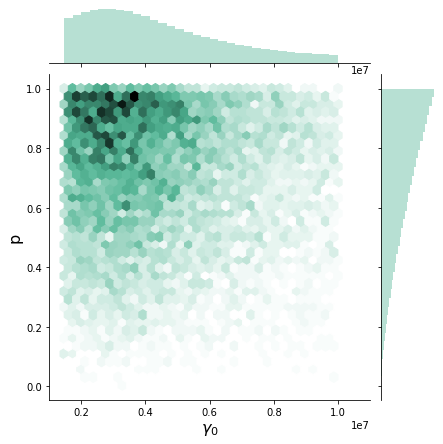

In [6]:
# Plot 
p = sns.jointplot(x=gamma_list, y=p_list, kind="hex", color="#4CB391")
#p.set_ylabel('p')
#p.set_xlabel('\gamma _0')
# JointGrid has a convenience function
p.set_axis_labels('$\gamma _0$', 'p', fontsize=16)


p.ax_joint.ticklabel_format(style='sci', scilimits=(0,0))
p.ax_marg_x.set_xlim(1000000, 11000000)



#### Plot again but add our p and gamma choices overlaid as in Figure 3 of the paper.

(1000000, 11000000)

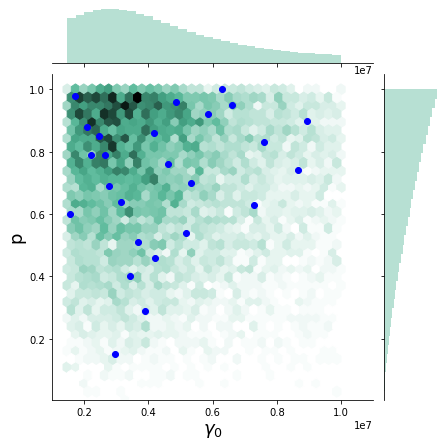

In [10]:
p = sns.jointplot(x=gamma_list, y=p_list, kind="hex", color="#4CB391")
#p.set_ylabel('p')
#p.set_xlabel('\gamma _0')
# JointGrid has a convenience function
p.set_axis_labels('$\gamma _0$', 'p', fontsize=18)


# the p and gamma values we use in our simulations
ps = [0.15, 0.29, 0.4, 0.46, 0.51, 0.54, 0.6, 0.63, 0.64, 0.69, 0.7, 0.74, 0.76, 0.79, 0.79, 0.83, 0.85, 0.86, 0.88, 0.9, 0.92, 0.95, 0.96, 0.98, 1.0]
gammas = [2954923, 3886395, 3440211, 4205230, 3677928, 5175963, 1560081, 7280916, 3139194, 2760685, 5321878, 8654548, 4609682, 2200776, 2640377, 7593133,2450186, 4167483, 2098892,8939808, 5864477,6598244, 4849305,1710386 ,6285577]  
# overlay our chosen p and gamma values.
p.ax_joint.plot(gammas, ps,'bo')


p.ax_joint.ticklabel_format(style='sci', scilimits=(0,0))
p.ax_marg_x.set_xlim(1000000, 11000000)

In [17]:
# p.savefig('testxyz.png', bbox_inches='tight', dpi=300)
# p.savefig('Fig3.pdf', bbox_inches='tight', dpi=300)